# Data Engineering

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('NY property data.csv')

## Remove list

In [7]:
remove_list = df['OWNER'].value_counts().head(20).index.tolist()
remove_list

['PARKCHESTER PRESERVAT',
 'PARKS AND RECREATION',
 'DCAS',
 'HOUSING PRESERVATION',
 'CITY OF NEW YORK',
 'DEPT OF ENVIRONMENTAL',
 'BOARD OF EDUCATION',
 'NEW YORK CITY HOUSING',
 'CNY/NYCTA',
 'NYC HOUSING PARTNERSH',
 'YORKVILLE TOWERS ASSO',
 'DEPARTMENT OF BUSINES',
 'DEPT OF TRANSPORTATIO',
 'MTA/LIRR',
 'PARCKHESTER PRESERVAT',
 'MH RESIDENTIAL 1, LLC',
 '434 M LLC',
 'LINCOLN PLAZA ASSOCIA',
 'DEUTSCHE BANK NATIONA',
 '561 11TH AVENUE TMG L']

In [8]:
remove_list.remove('YORKVILLE TOWERS ASSO')
remove_list.remove('434 M LLC')
remove_list.remove('DEUTSCHE BANK NATIONA')
remove_list.remove('561 11TH AVENUE TMG L')
remove_list.append('UNITED STATES OF AMER')
remove_list.append('U S GOVERNMENT OWNRD')
remove_list.append('THE CITY OF NEW YORK')
remove_list.append('NYS URBAN DEVELOPMENT')
remove_list.append('NYS DEPT OF ENVIRONME')
remove_list.append('CULTURAL AFFAIRS')
remove_list.append('DEPT OF GENERAL SERVI')
remove_list.append('DEPT RE-CITY OF NY')
remove_list.append('NY STATE PUBLIC WORKS')
remove_list.append('NYC DEPT OF HIGHWAYS')
remove_list.append("NYC DEP'T OF HIGHWAYS")
remove_list.append('CITY WIDE ADMINISTRAT')
remove_list.append('DEPT OF PUBLIC WORKS')
remove_list.append('NEW YORK CITY')
remove_list.append('THE PORT OFNY & NJ')
remove_list.append('NYC DEPT OF PUB WORKS')
remove_list.append('NEW YORK STATE DEPART')
remove_list.append('CITY AND NON-CITY OWN')

In [9]:
property_data = df[~df['OWNER'].isin(remove_list)].reset_index(drop = True)
property_data

,RECORD,BBLE,BORO,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,...,BLDFRONT,BLDDEPTH,AVLAND2,AVTOT2,EXLAND2,EXTOT2,EXCD2,PERIOD,YEAR,VALTYPE
0,1,1000010101,1,1,101,NaN,U S GOVT LAND & BLDGS,P7,4,500,...,0,0,3775500.0,8613000.0,3775500.0,8613000.0,NaN,FINAL,2010/11,AC-TR
1,2,1000010201,1,1,201,NaN,U S GOVT LAND & BLDGS,Z9,4,27,...,0,0,11111400.0,80690400.0,11111400.0,80690400.0,NaN,FINAL,2010/11,AC-TR
2,9,1000041001,1,4,1001,NaN,"TRZ HOLDINGS, LLC",R5,4,0,...,0,0,636093.0,2049290.0,NaN,NaN,NaN,FINAL,2010/11,AC-TR
3,10,1000041002,1,4,1002,NaN,"TRZ HOLDINGS, LLC",R5,4,0,...,0,0,919276.0,2961617.0,NaN,NaN,NaN,FINAL,2010/11,AC-TR
4,11,1000041003,1,4,1003,NaN,"TRZ HOLDINGS, LLC",R5,4,0,...,0,0,967500.0,5483912.0,NaN,NaN,NaN,FINAL,2010/11,AC-TR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1046511,1070990,5080500083,5,8050,83,NaN,"TOBIN, GALE",A1,1,60,...,30,26,NaN,NaN,NaN,NaN,NaN,FINAL,2010/11,AC-TR
1046512,1070991,5080500086,5,8050,86,NaN,SHERRI MILINAZZO,A1,1,62,...,32,26,NaN,NaN,NaN,NaN,NaN,FINAL,2010/11,AC-TR
1046513,1070992,5080500089,5,8050,89,NaN,JOHN GERVASI,A1,1,53,...,24,32,NaN,NaN,NaN,NaN,1017.0,FINAL,2010/11,AC-TR
1046514,1070993,5080500092,5,8050,92,NaN,RITA M MOOG,A1,1,52,...,32,21,NaN,NaN,NaN,NaN,NaN,FINAL,2010/11,AC-TR


In [10]:
len(df) - len(property_data)

24478

## Fill ZIP

In [11]:
missing_zips = np.where(pd.isnull(property_data['ZIP']))[0]
len(missing_zips)

21537

In [12]:
for i in range(len(missing_zips)):
    if(property_data.loc[missing_zips[i]+1, 'ZIP'] == property_data.loc[missing_zips[i] -1, 'ZIP']):
        property_data.loc[missing_zips[i], 'ZIP'] = property_data.loc[missing_zips[i]-1, 'ZIP']

In [13]:
missing_zips = np.where(pd.isnull(property_data['ZIP']))[0]
len(missing_zips)

10114

In [14]:
for i in range(len(missing_zips)):
    property_data.loc[missing_zips[i], 'ZIP'] = property_data.loc[missing_zips[i] - 1, 'ZIP']

In [15]:
missing_zips = np.where(pd.isnull(property_data['ZIP']))[0]
len(missing_zips)

0

## Filling in Missing FULLVAL, AVLAND, AVTOT

In [16]:
property_data['FULLVAL'].replace('NaN', 0)
temp = property_data[property_data['FULLVAL'] != 0]
mean_fullval = temp.groupby('TAXCLASS')['FULLVAL'].mean()
print(mean_fullval)

TAXCLASS
1     5.700050e+05
1A    3.352942e+05
1B    3.741718e+05
1C    7.615359e+05
1D    2.233614e+07
2     8.005832e+05
2A    8.639066e+05
2B    1.254525e+06
2C    7.723556e+05
3     8.510005e+04
4     2.713604e+06
Name: FULLVAL, dtype: float64


In [17]:
property_data['AVLAND'].replace('NaN', 0)
temp_avland = property_data[property_data['AVLAND'] != 0]
mean_avland = temp_avland.groupby('TAXCLASS')['AVLAND'].mean()

In [18]:
property_data['AVTOT'].replace('NaN', 0)
temp_avtot = property_data[property_data['AVTOT'] != 0]
mean_avtot = temp_avtot.groupby('TAXCLASS')['AVTOT'].mean()

In [19]:
for index in mean_fullval.index:
    property_data.loc[(property_data['FULLVAL'] == 0)&(property_data['TAXCLASS'] == index), 'FULLVAL'] = mean_fullval[index]
    property_data.loc[(property_data['AVLAND'] == 0)&(property_data['TAXCLASS'] == index), 'AVLAND'] = mean_avland[index]
    property_data.loc[(property_data['AVTOT'] == 0)&(property_data['TAXCLASS'] == index), 'AVTOT'] = mean_avtot[index]

## Filling in Missing STORIES

In [20]:
temp = property_data[property_data['STORIES'].isnull()]
len(temp)

43684

In [21]:
temp['TAXCLASS'].value_counts()

1B    19000
4     17768
2      3434
3      2398
1       877
2C      138
2B       34
2A       30
1A        5
Name: TAXCLASS, dtype: int64

In [22]:
mean_stories = property_data.groupby('TAXCLASS')['STORIES'].mean()
mean_stories

TAXCLASS
1      2.111631
1A     1.656867
1B     4.000000
1C     3.052748
1D     1.068966
2     16.310549
2A     2.844032
2B     4.001635
2C     4.745047
3      1.000000
4      5.517525
Name: STORIES, dtype: float64

In [23]:
len(property_data[property_data['STORIES'] == 0])

0

In [24]:
property_data['STORIES'] = property_data['STORIES'].fillna(value = 0)
for index in mean_stories.index:
    property_data.loc[(property_data['STORIES'] == 0) & (property_data['TAXCLASS'] == index), 'STORIES'] = mean_stories[index]

In [25]:
property_data.head().transpose()

,0,1,2,3,4
RECORD,1,2,9,10,11
BBLE,1000010101,1000010201,1000041001,1000041002,1000041003
BORO,1,1,1,1,1
BLOCK,1,1,4,4,4
LOT,101,201,1001,1002,1003
EASEMENT,NaN,NaN,NaN,NaN,NaN
OWNER,U S GOVT LAND & BLDGS,U S GOVT LAND & BLDGS,"TRZ HOLDINGS, LLC","TRZ HOLDINGS, LLC","TRZ HOLDINGS, LLC"
BLDGCL,P7,Z9,R5,R5,R5
TAXCLASS,4,4,4,4,4
LTFRONT,500,27,0,0,0


## Filling in Missing lot and Building Sizes

In [26]:
property_data.loc[property_data['LTFRONT'] == 0, 'LTFRONT'] = np.nan
property_data.loc[property_data['LTDEPTH'] == 0, 'LTDEPTH'] = np.nan
property_data.loc[property_data['BLDFRONT'] == 0, 'BLDFRONT'] = np.nan
property_data.loc[property_data['BLDDEPTH'] == 0, 'BLDDEPTH'] = np.nan
property_data.loc[property_data['LTFRONT'] == 1, 'LTFRONT'] = np.nan
property_data.loc[property_data['LTDEPTH'] == 1, 'LTDEPTH'] = np.nan
property_data.loc[property_data['BLDFRONT'] == 1, 'BLDFRONT'] = np.nan
property_data.loc[property_data['BLDDEPTH'] == 1, 'BLDDEPTH'] = np.nan

mean_LTFRONT = property_data.groupby(property_data['TAXCLASS'])['LTFRONT'].mean()
mean_LTDEPTH = property_data.groupby(property_data['TAXCLASS'])['LTDEPTH'].mean()
mean_BLDFRONT = property_data.groupby(property_data['TAXCLASS'])['BLDFRONT'].mean()
mean_BLDDEPTH = property_data.groupby(property_data['TAXCLASS'])['BLDDEPTH'].mean()

for index in mean_LTFRONT.index:
    property_data.loc[(property_data['LTFRONT'].isnull())&(property_data['TAXCLASS']==index), 'LTFRONT'] = mean_LTFRONT[index]
    property_data.loc[(property_data['LTDEPTH'].isnull())&(property_data['TAXCLASS']==index), 'LTDEPTH'] = mean_LTDEPTH[index]
    property_data.loc[(property_data['BLDFRONT'].isnull())&(property_data['TAXCLASS']==index), 'BLDFRONT'] = mean_BLDFRONT[index]
    property_data.loc[(property_data['BLDDEPTH'].isnull())&(property_data['TAXCLASS']==index), 'BLDDEPTH'] = mean_BLDDEPTH[index]

In [27]:
property_data['BLDDEPTH'].isnull().sum()

0

## Making variables

In [28]:
property_data['ZIP'] = property_data['ZIP'].astype(str)
property_data['zip3'] = property_data['ZIP'].str[:3]

In [29]:
property_data['ltsize'] = property_data['LTFRONT'] * property_data['LTDEPTH']
property_data['bldsize'] = property_data['BLDFRONT'] * property_data['BLDDEPTH']
property_data['bldvol'] = property_data['bldsize'] * property_data['STORIES']

In [30]:
property_data['r1'] = property_data['FULLVAL'] / property_data['ltsize']
property_data['r2'] = property_data['FULLVAL'] / property_data['bldsize']
property_data['r3'] = property_data['FULLVAL'] / property_data['bldvol']

property_data['r4'] = property_data['AVLAND'] / property_data['ltsize']
property_data['r5'] = property_data['AVLAND'] / property_data['bldsize']
property_data['r6'] = property_data['AVLAND'] / property_data['bldvol']

property_data['r7'] = property_data['AVTOT'] / property_data['ltsize']
property_data['r8'] = property_data['AVTOT'] / property_data['bldsize']
property_data['r9'] = property_data['AVTOT'] / property_data['bldvol']

## Adding in the inverse of all the primary variables

In [31]:
property_data.columns[36:]

Index(['r1', 'r2', 'r3', 'r4', 'r5', 'r6', 'r7', 'r8', 'r9'], dtype='object')

In [32]:
for col in property_data.columns[36:]:
    property_data[col+'inv'] = 1 / (property_data[col])

In [33]:
vars18 = ['r1', 'r2', 'r3', 'r4', 'r5', 'r6', 'r7', 'r8', 'r9', 'r1inv', 'r2inv', 'r3inv', 'r4inv', 'r5inv', 'r6inv', 'r7inv', 'r8inv', 'r9inv']

zip5_mean = property_data.groupby('ZIP')[vars18].mean()
zip3_mean = property_data.groupby('zip3')[vars18].mean()
taxclass_mean = property_data.groupby('TAXCLASS')[vars18].mean()
borough_mean = property_data.groupby('BORO')[vars18].mean()
property_data = property_data.join(zip5_mean, on = 'ZIP', rsuffix = '_zip5')
property_data = property_data.join(zip3_mean, on = 'zip3', rsuffix = '_zip3')
property_data = property_data.join(taxclass_mean, on = 'TAXCLASS', rsuffix = '_taxclass')
property_data = property_data.join(borough_mean, on = 'BORO', rsuffix = '_boro')
rsuffix = ['_zip5', '_zip3', '_taxclass', '_boro']
for var in vars18:
    for r in rsuffix:
        property_data[str(var)+r] = property_data[var] / property_data[str(var)+r]

In [34]:
property_data

,RECORD,BBLE,BORO,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,...,r9_boro,r1inv_boro,r2inv_boro,r3inv_boro,r4inv_boro,r5inv_boro,r6inv_boro,r7inv_boro,r8inv_boro,r9inv_boro
0,1,1000010101,1,1,101,NaN,U S GOVT LAND & BLDGS,P7,4,500.000000,...,14.987985,0.102507,0.001655,0.000444,0.038107,0.000569,0.000147,0.106898,0.001730,0.000459
1,2,1000010201,1,1,201,NaN,U S GOVT LAND & BLDGS,Z9,4,27.000000,...,135.732317,0.000073,0.000183,0.000049,0.000072,0.000168,0.000043,0.000076,0.000191,0.000051
2,9,1000041001,1,4,1001,NaN,"TRZ HOLDINGS, LLC",R5,4,82.137226,...,0.304877,0.010850,0.008979,0.021849,0.004939,0.003780,0.008825,0.011314,0.009383,0.022542
3,10,1000041002,1,4,1002,NaN,"TRZ HOLDINGS, LLC",R5,4,82.137226,...,0.440605,0.007507,0.006213,0.015118,0.003417,0.002616,0.006106,0.007829,0.006492,0.015598
4,11,1000041003,1,4,1003,NaN,"TRZ HOLDINGS, LLC",R5,4,82.137226,...,0.819237,0.004038,0.003341,0.008131,0.003247,0.002485,0.005802,0.004211,0.003492,0.008389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1046511,1070990,5080500083,5,8050,83,NaN,"TOBIN, GALE",A1,1,60.000000,...,0.693414,0.085139,0.009923,0.004477,0.199267,0.059672,0.033172,0.152676,0.043314,0.023301
1046512,1070991,5080500086,5,8050,86,NaN,SHERRI MILINAZZO,A1,1,62.000000,...,0.416129,0.134586,0.008522,0.003845,0.611294,0.099453,0.055287,0.468275,0.072175,0.038828
1046513,1070992,5080500089,5,8050,89,NaN,JOHN GERVASI,A1,1,53.000000,...,0.867212,0.156124,0.008915,0.003218,0.393566,0.057745,0.025681,0.311450,0.043291,0.018632
1046514,1070993,5080500092,5,8050,92,NaN,RITA M MOOG,A1,1,52.000000,...,0.993774,0.067455,0.006896,0.002489,0.229661,0.060324,0.026828,0.151817,0.037778,0.016259


In [35]:
property_data['r6_boro']

0          13.729307
1          46.495417
2           0.228069
3           0.329603
4           0.346893
             ...    
1046511     0.753057
1046512     0.451832
1046513     0.972735
1046514     0.931150
1046515     0.986442
Name: r6_boro, Length: 1046516, dtype: float64

In [36]:
property_data.columns

Index(['RECORD', 'BBLE', 'BORO', 'BLOCK', 'LOT', 'EASEMENT', 'OWNER', 'BLDGCL',
       'TAXCLASS', 'LTFRONT',
       ...
       'r9_boro', 'r1inv_boro', 'r2inv_boro', 'r3inv_boro', 'r4inv_boro',
       'r5inv_boro', 'r6inv_boro', 'r7inv_boro', 'r8inv_boro', 'r9inv_boro'],
      dtype='object', length=126)

In [37]:
cols = property_data.iloc[:,36:].columns.tolist()
cols

['r1',
 'r2',
 'r3',
 'r4',
 'r5',
 'r6',
 'r7',
 'r8',
 'r9',
 'r1inv',
 'r2inv',
 'r3inv',
 'r4inv',
 'r5inv',
 'r6inv',
 'r7inv',
 'r8inv',
 'r9inv',
 'r1_zip5',
 'r2_zip5',
 'r3_zip5',
 'r4_zip5',
 'r5_zip5',
 'r6_zip5',
 'r7_zip5',
 'r8_zip5',
 'r9_zip5',
 'r1inv_zip5',
 'r2inv_zip5',
 'r3inv_zip5',
 'r4inv_zip5',
 'r5inv_zip5',
 'r6inv_zip5',
 'r7inv_zip5',
 'r8inv_zip5',
 'r9inv_zip5',
 'r1_zip3',
 'r2_zip3',
 'r3_zip3',
 'r4_zip3',
 'r5_zip3',
 'r6_zip3',
 'r7_zip3',
 'r8_zip3',
 'r9_zip3',
 'r1inv_zip3',
 'r2inv_zip3',
 'r3inv_zip3',
 'r4inv_zip3',
 'r5inv_zip3',
 'r6inv_zip3',
 'r7inv_zip3',
 'r8inv_zip3',
 'r9inv_zip3',
 'r1_taxclass',
 'r2_taxclass',
 'r3_taxclass',
 'r4_taxclass',
 'r5_taxclass',
 'r6_taxclass',
 'r7_taxclass',
 'r8_taxclass',
 'r9_taxclass',
 'r1inv_taxclass',
 'r2inv_taxclass',
 'r3inv_taxclass',
 'r4inv_taxclass',
 'r5inv_taxclass',
 'r6inv_taxclass',
 'r7inv_taxclass',
 'r8inv_taxclass',
 'r9inv_taxclass',
 'r1_boro',
 'r2_boro',
 'r3_boro',
 'r4_boro'

In [38]:
col_stat = {}
for col in cols:
    col_stat[col] = [property_data[col].count(), property_data[col].mean(), property_data[col].std(), 
                     property_data[col].min(), property_data[col].quantile(0.25), property_data[col].quantile(0.5),
                     property_data[col].quantile(0.75), property_data[col].max()]
result = pd.DataFrame(col_stat).transpose()
result.rename(columns = {0:'count', 1:'mean', 2:'std', 3:'min', 4:'25%', 5:'50%', 6:'75%', 7:'max'}, inplace = True)
result

,count,mean,std,min,25%,50%,75%,max
r1,1046516.0,213.503808,528.509868,3.920017e-04,76.375353,152.916667,243.200000,135680.195265
r2,1046516.0,536.237504,1015.743970,7.470782e-04,212.235545,500.000000,683.891491,310742.524961
r3,1046516.0,243.931653,486.583927,8.983394e-05,82.741261,239.102564,336.257310,227500.000000
r4,1046516.0,10.453704,69.427805,8.333333e-06,2.356020,4.598000,7.225959,22032.314558
r5,1046516.0,22.710592,373.449262,2.096125e-04,6.215246,14.983333,20.287152,334842.138488
...,...,...,...,...,...,...,...,...
r5inv_boro,1046516.0,1.000000,19.450371,4.203214e-06,0.058377,0.080627,0.150912,3631.168214
r6inv_boro,1046516.0,1.000000,29.382102,4.480289e-07,0.013570,0.024501,0.055710,3229.769331
r7inv_boro,1046516.0,1.000000,62.640625,9.752543e-06,0.147765,0.303232,0.502178,59345.351446
r8inv_boro,1046516.0,1.000000,24.510354,4.381270e-06,0.084663,0.129699,0.207992,13798.782934


In [39]:
#result.to_excel("HW2.xlsx")

In [40]:
property_data

,RECORD,BBLE,BORO,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,...,r9_boro,r1inv_boro,r2inv_boro,r3inv_boro,r4inv_boro,r5inv_boro,r6inv_boro,r7inv_boro,r8inv_boro,r9inv_boro
0,1,1000010101,1,1,101,NaN,U S GOVT LAND & BLDGS,P7,4,500.000000,...,14.987985,0.102507,0.001655,0.000444,0.038107,0.000569,0.000147,0.106898,0.001730,0.000459
1,2,1000010201,1,1,201,NaN,U S GOVT LAND & BLDGS,Z9,4,27.000000,...,135.732317,0.000073,0.000183,0.000049,0.000072,0.000168,0.000043,0.000076,0.000191,0.000051
2,9,1000041001,1,4,1001,NaN,"TRZ HOLDINGS, LLC",R5,4,82.137226,...,0.304877,0.010850,0.008979,0.021849,0.004939,0.003780,0.008825,0.011314,0.009383,0.022542
3,10,1000041002,1,4,1002,NaN,"TRZ HOLDINGS, LLC",R5,4,82.137226,...,0.440605,0.007507,0.006213,0.015118,0.003417,0.002616,0.006106,0.007829,0.006492,0.015598
4,11,1000041003,1,4,1003,NaN,"TRZ HOLDINGS, LLC",R5,4,82.137226,...,0.819237,0.004038,0.003341,0.008131,0.003247,0.002485,0.005802,0.004211,0.003492,0.008389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1046511,1070990,5080500083,5,8050,83,NaN,"TOBIN, GALE",A1,1,60.000000,...,0.693414,0.085139,0.009923,0.004477,0.199267,0.059672,0.033172,0.152676,0.043314,0.023301
1046512,1070991,5080500086,5,8050,86,NaN,SHERRI MILINAZZO,A1,1,62.000000,...,0.416129,0.134586,0.008522,0.003845,0.611294,0.099453,0.055287,0.468275,0.072175,0.038828
1046513,1070992,5080500089,5,8050,89,NaN,JOHN GERVASI,A1,1,53.000000,...,0.867212,0.156124,0.008915,0.003218,0.393566,0.057745,0.025681,0.311450,0.043291,0.018632
1046514,1070993,5080500092,5,8050,92,NaN,RITA M MOOG,A1,1,52.000000,...,0.993774,0.067455,0.006896,0.002489,0.229661,0.060324,0.026828,0.151817,0.037778,0.016259


In [41]:
data = property_data.copy()

In [42]:
save_record = data['RECORD']

In [43]:
data = data.iloc[:,36:]

In [44]:
data

,r1,r2,r3,r4,r5,r6,r7,r8,r9,r1inv,...,r9_boro,r1inv_boro,r2inv_boro,r3inv_boro,r4inv_boro,r5inv_boro,r6inv_boro,r7inv_boro,r8inv_boro,r9inv_boro
0,40.917782,3996.868587,724.395187,8.079350,789.194776,143.034199,18.413002,1798.590864,325.977834,0.024439,...,14.987985,0.102507,0.001655,0.000444,0.038107,0.000569,0.000147,0.106898,0.001730,0.000459
1,57777.406626,36195.940760,6560.176972,4266.226465,2672.672406,484.396968,25999.832982,16288.173342,2952.079637,0.000017,...,135.732317,0.000073,0.000183,0.000049,0.000072,0.000168,0.000043,0.000076,0.000191,0.000051
2,386.588395,736.761464,14.735229,62.337391,118.802810,2.376056,173.964788,331.542677,6.630854,0.002587,...,0.304877,0.010850,0.008979,0.021849,0.004939,0.003780,0.008825,0.011314,0.009383,0.022542
3,558.693624,1064.760189,21.295204,90.089449,171.692774,3.433855,251.412180,479.142178,9.582844,0.001790,...,0.440605,0.007507,0.006213,0.015118,0.003417,0.002616,0.006106,0.007829,0.006492,0.015598
4,1038.804619,1979.757338,39.595147,94.815422,180.699549,3.613991,467.462079,890.890802,17.817816,0.000963,...,0.819237,0.004038,0.003341,0.008131,0.003247,0.002485,0.005802,0.004211,0.003492,0.008389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1046511,60.833333,561.538462,224.615385,2.018889,18.635897,7.454359,3.239167,29.900000,11.960000,0.016438,...,0.693414,0.085139,0.009923,0.004477,0.199267,0.059672,0.033172,0.152676,0.043314,0.023301
1046512,38.483305,653.846154,261.538462,0.658107,11.181490,4.472596,1.056098,17.943510,7.177404,0.025985,...,0.416129,0.134586,0.008522,0.003845,0.611294,0.099453,0.055287,0.468275,0.072175,0.038828
1046513,33.174373,625.000000,312.500000,1.022185,19.257812,9.628906,1.587878,29.915365,14.957682,0.030144,...,0.867212,0.156124,0.008915,0.003218,0.393566,0.057745,0.025681,0.311450,0.043291,0.018632
1046514,76.781674,808.035714,404.017857,1.751697,18.434524,9.217262,3.257494,34.281250,17.140625,0.013024,...,0.993774,0.067455,0.006896,0.002489,0.229661,0.060324,0.026828,0.151817,0.037778,0.016259


In [45]:
data_zs = (data - data.mean()) / data.std()
data_zs_save = data_zs.copy()
data_zs.describe()

,r1,r2,r3,r4,r5,r6,r7,r8,r9,r1inv,...,r9_boro,r1inv_boro,r2inv_boro,r3inv_boro,r4inv_boro,r5inv_boro,r6inv_boro,r7inv_boro,r8inv_boro,r9inv_boro
count,1.046516e+06,1.046516e+06,1.046516e+06,1.046516e+06,1.046516e+06,1.046516e+06,1.046516e+06,1.046516e+06,1.046516e+06,1.046516e+06,...,1.046516e+06,1.046516e+06,1.046516e+06,1.046516e+06,1.046516e+06,1.046516e+06,1.046516e+06,1.046516e+06,1.046516e+06,1.046516e+06
mean,-4.987863e-14,-4.120539e-14,-4.213792e-15,-1.192801e-14,-1.523930e-15,6.895732e-16,-4.875373e-14,-2.857037e-15,-1.090882e-14,-5.867553e-15,...,2.007761e-15,1.238156e-15,-2.316146e-15,-6.055043e-16,-2.560382e-15,-7.841169e-15,2.958956e-15,3.110794e-16,-2.496063e-15,2.999359e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-4.039724e-01,-5.279251e-01,-5.013145e-01,-1.505693e-01,-6.081250e-02,-5.747917e-02,-1.328478e-01,-5.410804e-02,-5.868685e-02,-1.970110e-02,...,-6.391883e-02,-1.759386e-02,-2.268715e-02,-2.076027e-02,-1.960607e-02,-5.141268e-02,-3.403431e-02,-1.596393e-02,-4.079891e-02,-4.659194e-02
25%,-2.594624e-01,-3.189799e-01,-3.312695e-01,-1.166346e-01,-4.417025e-02,-4.582967e-02,-1.066404e-01,-3.531737e-02,-3.673350e-02,-1.897378e-02,...,-3.880826e-02,-1.673407e-02,-2.201533e-02,-2.061962e-02,-1.797203e-02,-4.841156e-02,-3.357250e-02,-1.360515e-02,-3.734491e-02,-4.505767e-02
50%,-1.146377e-01,-3.567583e-02,-9.924473e-03,-8.434234e-02,-2.069159e-02,-1.627775e-02,-9.028477e-02,-2.510215e-02,-1.948221e-02,-1.854359e-02,...,-2.062950e-02,-1.627134e-02,-2.169611e-02,-2.053040e-02,-1.682510e-02,-4.726764e-02,-3.320045e-02,-1.112325e-02,-3.550747e-02,-4.412737e-02
75%,5.618853e-02,1.453654e-01,1.897425e-01,-4.649066e-02,-6.489343e-03,4.138601e-04,-6.574734e-02,-1.540155e-02,-4.344369e-03,-1.738226e-02,...,-3.517677e-03,-1.503698e-02,-2.064109e-02,-2.021859e-02,-1.448689e-02,-4.365410e-02,-3.213827e-02,-7.947278e-03,-3.231318e-02,-4.248983e-02
max,2.563182e+02,3.053981e+02,4.670439e+02,3.171908e+02,8.965594e+02,6.432875e+02,3.142499e+02,9.373068e+02,8.985515e+02,4.520239e+02,...,8.910096e+02,6.645625e+02,7.831392e+02,8.003317e+02,9.464894e+02,1.866375e+02,1.098890e+02,9.473780e+02,5.629369e+02,4.959927e+02


In [46]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.99, svd_solver = 'full')
pca.fit(data_zs)

PCA(n_components=0.99, svd_solver='full')

(0.0, 1.0)

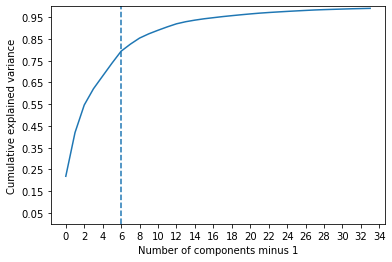

In [47]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components minus 1')
plt.ylabel('Cumulative explained variance')
plt.yticks(np.arange(0.05, 1.1, step = 0.1))
plt.xticks(np.arange(0,36, step = 2))
plt.axvline(x = 6, linestyle = '--')
plt.ylim(0,1)

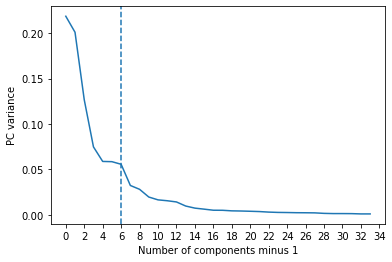

In [48]:
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Number of components minus 1')
plt.ylabel('PC variance')
plt.xticks(np.arange(0, 36, step = 2))
plt.axvline(x = 6, linestyle = '--')

In [49]:
data_zs = data_zs_save.copy()
pca = PCA(n_components = 7, svd_solver = 'full')
princ_comps = pca.fit_transform(data_zs)
pca.n_components_

7

In [50]:
data_pca = pd.DataFrame(princ_comps)
data_pca

,0,1,2,3,4,5,6
0,7.850153,0.886670,-1.684512,0.106893,1.999975,-5.274413,1.744727
1,120.108997,11.479361,201.745241,0.413741,17.467187,-48.892831,18.225314
2,0.252014,-0.258294,0.715622,0.005988,-0.069907,0.338086,-0.110430
3,0.857297,-0.192803,1.453910,0.008882,0.017319,0.094504,-0.022995
4,2.120622,-0.061843,2.998115,0.022148,0.342961,-0.807133,0.287248
...,...,...,...,...,...,...,...
1046511,-0.208001,-0.170693,-0.645883,0.037259,0.046982,-0.083062,-0.126259
1046512,-0.304054,-0.029425,-0.734932,0.159620,0.129362,-0.328304,-0.190539
1046513,-0.097220,-0.071851,-0.796101,0.108055,0.168205,-0.310278,-0.119419
1046514,0.171044,-0.134455,-0.592159,0.063390,0.261727,-0.649741,0.075910


In [51]:
data_pca_zs = (data_pca - data_pca.mean()) / data_pca.std()
data_pca_zs.describe()

,0,1,2,3,4,5,6
count,1.046516e+06,1.046516e+06,1.046516e+06,1.046516e+06,1.046516e+06,1.046516e+06,1.046516e+06
mean,-2.378976e-17,-5.015455e-17,-1.076309e-16,8.746870e-17,-1.525721e-16,5.572906e-16,2.309575e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-5.821852e+01,-8.891024e-02,-2.399561e+02,-2.940419e+02,-3.364301e+02,-2.238167e+02,-2.821592e+02
25%,-1.033812e-01,-5.119081e-02,-1.555735e-01,-2.735354e-03,-8.111186e-02,-1.327432e-01,-8.786648e-02
50%,-1.722495e-02,-4.480539e-02,-6.019241e-02,2.607797e-03,4.683933e-03,-1.151279e-02,-3.336247e-02
75%,4.002710e-02,-3.567613e-02,3.200520e-02,9.450733e-03,5.391875e-02,2.843840e-01,1.234761e-02
max,6.972967e+02,4.059682e+02,3.235610e+02,8.135371e+02,4.420073e+02,5.187210e+02,4.111819e+02


In [52]:
p1 = 2
oop1 = 1 / p1
score1 = (((data_pca_zs).abs() ** p1).sum(axis = 1)) ** oop1

In [53]:
from sklearn.neural_network import MLPRegressor
NNmodel = MLPRegressor(hidden_layer_sizes = (3), activation = 'logistic', max_iter = 50, random_state = 1)
NNmodel.fit(data_pca_zs, data_pca_zs)
pca_out = NNmodel.predict(data_pca_zs)
error = pca_out - data_pca_zs
p2 = 2
oop2 = 1/p2
score2 = ((error.abs() ** p2).sum(axis = 1)) ** oop2

C:\Users\songq\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


In [54]:
scores = pd.DataFrame(score1)
scores.columns = ['score1']
scores['score2'] = score2
scores['RECORD'] = save_record
scores['score1 rank'] = scores['score1'].rank()
scores['score2 rank'] = scores['score2'].rank()
scores['final'] = (.5*scores['score1 rank'] + .5 * scores['score2 rank'])
scores_sorted = scores.sort_values(by = ['final', 'RECORD'], ascending = [False, True])

(0.1, 2088874.5789512645)

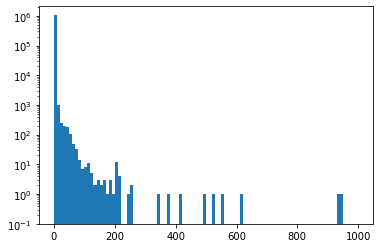

In [55]:
plt.hist(score1, bins = 100, range = (0, 1000))
plt.yscale('log')
plt.ylim(ymin = 0.1)

(0.1, 2091114.9142022934)

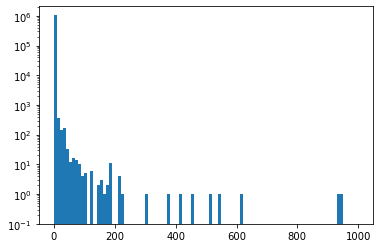

In [56]:
plt.hist(score2, bins = 100, range = (0,1000))
plt.yscale('log')
plt.ylim(ymin = 0.1)

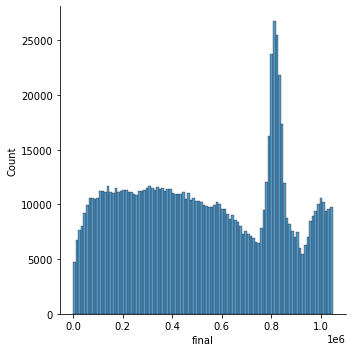

In [57]:
sns.displot(scores['final'])

In [58]:
scores_sorted

,score1,score2,RECORD,score1 rank,score2 rank,final
898718,945.415431,942.098780,917942,1046516.0,1046516.0,1046516.0
975385,932.664404,932.557334,996722,1046515.0,1046515.0,1046515.0
674960,612.794094,612.181697,691986,1046514.0,1046514.0,1046514.0
935946,553.562341,548.630560,956520,1046513.0,1046513.0,1046513.0
701584,527.014185,519.780884,718883,1046512.0,1046512.0,1046512.0
...,...,...,...,...,...,...
821269,0.049256,0.013042,839406,15.5,37.5,26.5
821270,0.049256,0.013042,839407,15.5,37.5,26.5
821271,0.049256,0.013042,839408,15.5,37.5,26.5
821258,0.049302,0.012925,839395,22.0,29.0,25.5


In [59]:
scores_sorted.head(30)

,score1,score2,RECORD,score1 rank,score2 rank,final
898718,945.415431,942.098780,917942,1046516.0,1046516.0,1046516.0
975385,932.664404,932.557334,996722,1046515.0,1046515.0,1046515.0
674960,612.794094,612.181697,691986,1046514.0,1046514.0,1046514.0
935946,553.562341,548.630560,956520,1046513.0,1046513.0,1046513.0
701584,527.014185,519.780884,718883,1046512.0,1046512.0,1046512.0
444274,492.296997,459.065257,459429,1046511.0,1046511.0,1046511.0
642107,419.275446,413.664451,658933,1046510.0,1046510.0,1046510.0
632996,375.233006,374.825875,649717,1046509.0,1046509.0,1046509.0
1036106,348.772118,308.926098,1059883,1046508.0,1046508.0,1046508.0
11984,257.160463,222.415693,12076,1046507.0,1046507.0,1046507.0


In [60]:
scores = scores.iloc[:,2:]

In [61]:
scores

,RECORD,score1 rank,score2 rank,final
0,1,1033650.0,1025652.0,1029651.0
1,2,1046396.0,1046392.0,1046394.0
2,9,574151.0,481156.0,527653.5
3,10,754258.0,507657.0,630957.5
4,11,1004035.0,918842.0,961438.5
...,...,...,...,...
1046511,1070990,463420.0,314582.0,389001.0
1046512,1070991,594409.0,650371.0,622390.0
1046513,1070992,590194.0,513216.0,551705.0
1046514,1070993,654853.0,596807.0,625830.0


In [62]:
result = df.merge(scores.reset_index(drop=True),on='RECORD')

In [63]:
result = result.sort_values(by=['final','RECORD'], ascending=[False,True])

In [64]:
result = result.head(30)
result

,RECORD,BBLE,BORO,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,...,AVTOT2,EXLAND2,EXTOT2,EXCD2,PERIOD,YEAR,VALTYPE,score1 rank,score2 rank,final
898718,917942,4142600001,4,14260,1,NaN,"LOGAN PROPERTY, INC.",T1,4,4910,...,4.501180e+09,1.644454e+09,4.501180e+09,NaN,FINAL,2010/11,AC-TR,1046516.0,1046516.0,1046516.0
975385,996722,5029220125,5,2922,125,NaN,IMPERIAL COURT HOMEOW,V0,1B,300,...,NaN,NaN,NaN,NaN,FINAL,2010/11,AC-TR,1046515.0,1046515.0,1046515.0
674960,691986,4039160200,4,3916,200,NaN,TITAN SOUNDVIEW POINT,Z7,4,0,...,3.000000e+00,NaN,NaN,NaN,FINAL,2010/11,AC-TR,1046514.0,1046514.0,1046514.0
935946,956520,5006590012,5,659,12,NaN,TROMPETA RIZALINA,A1,1,25,...,NaN,NaN,NaN,NaN,FINAL,2010/11,AC-TR,1046513.0,1046513.0,1046513.0
701584,718883,4051251107,4,5125,1107,NaN,GARDEN VIEW LTD,R4,2,0,...,NaN,NaN,NaN,NaN,FINAL,2010/11,AC-TR,1046512.0,1046512.0,1046512.0
444274,459429,3059930075,3,5993,75,NaN,NaN,V0,1B,8,...,NaN,NaN,NaN,NaN,FINAL,2010/11,AC-TR,1046511.0,1046511.0,1046511.0
642107,658933,4029060054,4,2906,54,NaN,WAN CHIU CHEUNG,C0,1,25,...,NaN,NaN,NaN,NaN,FINAL,2010/11,AC-TR,1046510.0,1046510.0,1046510.0
632996,649717,4025270002,4,2527,2,NaN,57-43 LLC,V1,4,51,...,NaN,NaN,NaN,NaN,FINAL,2010/11,AC-TR,1046509.0,1046509.0,1046509.0
1036106,1059883,5069770012E,5,6977,12,E,NaN,Z7,4,5,...,NaN,NaN,NaN,NaN,FINAL,2010/11,AC-TR,1046508.0,1046508.0,1046508.0
11984,12076,1001790001,1,179,1,NaN,15 WORTH STREET PROPE,G6,4,74,...,9.414000e+05,NaN,NaN,NaN,FINAL,2010/11,AC-TR,1046507.0,1046507.0,1046507.0


In [66]:
result.to_csv('HW3.csv',index = False)